In [ ]:
!pip install statstests

In [ ]:
import pandas as pd #manipulação de dados em formato de dataframe
import seaborn as sns #biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt #biblioteca de visualização de dados
import statsmodels.api as sm #biblioteca de modelagem estatística
import numpy as np #biblioteca para operações matemáticas multidimensionais
from math import exp #operação matemática exponencial
from scipy import stats #estatística chi2
from statstests.process import stepwise #procedimento Stepwise
from statsmodels.iolib.summary2 import summary_col #comparação entre modelos
import plotly.graph_objs as go #gráficos 3D
import plotly.io as pio #plotagens tridimensionais no browser
import statsmodels.formula.api as smf #estimação do modelo logístico binário
from statsmodels.discrete.discrete_model import MNLogit #estimação do modelo
    #logístico multinomial
from statsmodels.discrete.discrete_model import Probit #estimação do modelo probit
from scipy.stats import norm #função densidade de probabilidade da distribuição normal

In [ ]:
def prob_logit(z):
    return 1 / (1 + exp(-z))

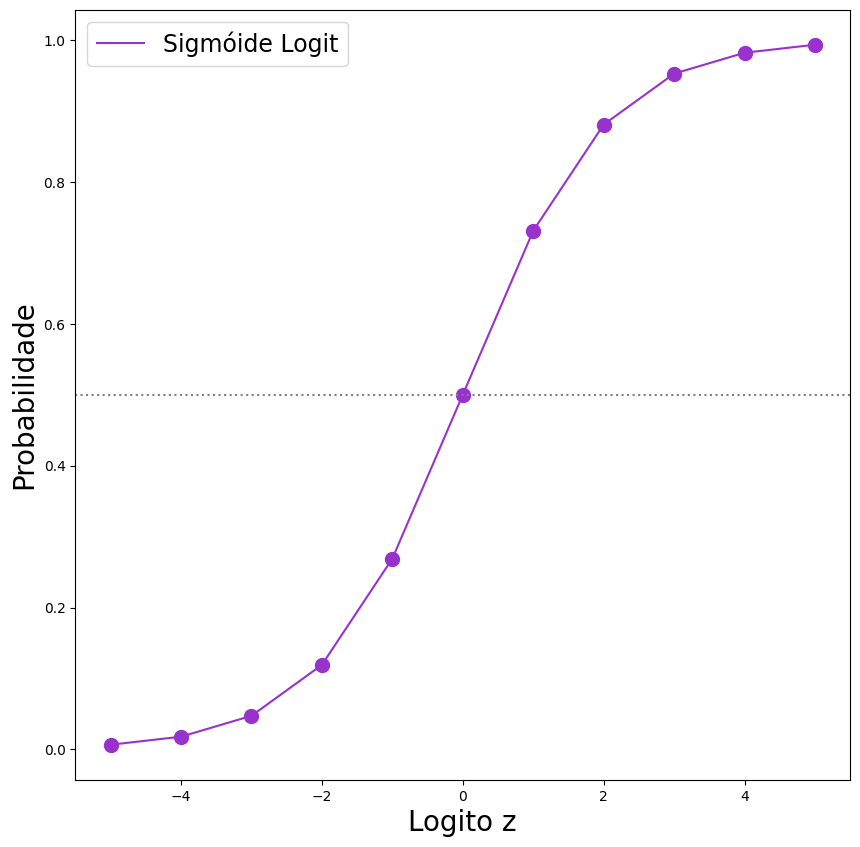

In [ ]:
# Plotagem da curva sigmóide teórica para as probablidades de ocorrência de um
#evento, para um range de logito z entre -5 e +5

z = []
probs_logit = []

for i in np.arange(-5,6):
    z.append(i)
    probs_logit.append(prob_logit(i))

df = pd.DataFrame({'z':z,'probs_logit':probs_logit})

plt.figure(figsize=(10,10))
plt.plot(df.z, df.probs_logit, color='darkorchid')
plt.scatter(df.z, df.probs_logit, color = 'darkorchid', s = 100)
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Logito z', fontsize=20)
plt.ylabel('Probabilidade', fontsize=20)
plt.legend(['Sigmóide Logit'], fontsize=17)
plt.show()

In [ ]:
import pandas as pd

dados = pd.read_csv('/content/atrasado.csv', sep = ',')
dados.head()

,estudante,atrasado,dist,sem,per,perfil
0,Gabriela,0,12.5,7,manha,calmo
1,Patricia,0,13.3,10,manha,calmo
2,Gustavo,0,13.4,8,manha,moderado
3,Leticia,0,23.5,7,manha,calmo
4,Luiz Ovidio,0,9.5,8,manha,calmo


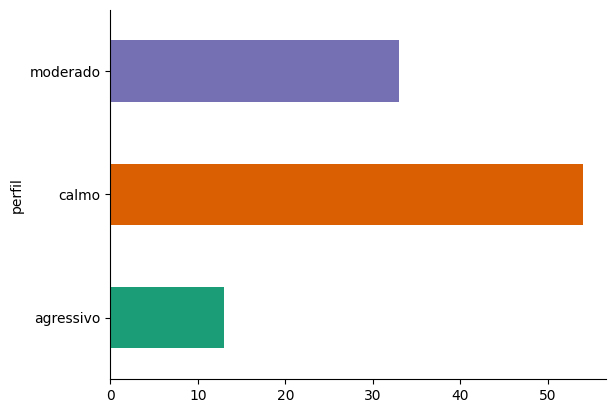

In [ ]:
# @title perfil

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('perfil').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    int64  
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
 4   per        100 non-null    object 
 5   perfil     100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [ ]:
dados.describe()

,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000


In [ ]:
dados['atrasado'].value_counts()

atrasado
1    59
0    41
Name: count, dtype: int64

In [ ]:
dados['per'].value_counts()

per
tarde    62
manha    38
Name: count, dtype: int64

In [ ]:
dados = pd.get_dummies(dados,
                             columns=['per', 'perfil'],
                             drop_first=False)


dados

,estudante,atrasado,dist,sem,per_manha,per_tarde,perfil_agressivo,perfil_calmo,perfil_moderado
0,Gabriela,0,12.5,7,True,False,False,True,False
1,Patricia,0,13.3,10,True,False,False,True,False
2,Gustavo,0,13.4,8,True,False,False,False,True
3,Leticia,0,23.5,7,True,False,False,True,False
4,Luiz Ovidio,0,9.5,8,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
95,Sheila,1,24.0,10,False,True,False,True,False
96,Pedro,1,10.0,10,False,True,False,False,True
97,Horacio,1,9.4,10,False,True,False,False,True
98,Leandro,1,14.2,10,True,False,True,False,False


In [ ]:
del dados['per_tarde']
del dados['perfil_calmo']

In [ ]:
dados

,estudante,atrasado,dist,sem,per_manha,perfil_agressivo,perfil_moderado
0,Gabriela,0,12.5,7,True,False,False
1,Patricia,0,13.3,10,True,False,False
2,Gustavo,0,13.4,8,True,False,True
3,Leticia,0,23.5,7,True,False,False
4,Luiz Ovidio,0,9.5,8,True,False,False
...,...,...,...,...,...,...,...
95,Sheila,1,24.0,10,False,False,False
96,Pedro,1,10.0,10,False,False,True
97,Horacio,1,9.4,10,False,False,True
98,Leandro,1,14.2,10,True,True,False


In [ ]:
modelo_logit = smf.glm(formula='atrasado ~ dist + sem + per_manha +\
                       perfil_moderado + perfil_agressivo', data=dados,
                       family=sm.families.Binomial()).fit()

# Parâmetros do 'modelo_logit'
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                            GLM   Df Residuals:                       94
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.066
Date:                Thu, 04 Apr 2024   Deviance:                       58.131
Time:                        23:18:51   Pearson chi2:                     67.0
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5381
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -30.2003      9.981     -3.026      0.002     -49.763     -10.638
per_manha[T.True]           -3.6534      0.878     -4.160      0.000      -5.374      -1.932
perfil_moderado[T.True]      1.3460      0.748      1.800      0.072      -0.120       2.812
perfil_agressivo[T.True]     2.9145      1.179      2.472      0.013       0.604       5.225
dist                         0.2202      0.110      2.007      0.045       0.005       0.435
sem                          2.7667      0.922      3.002      0.003       0.960       4.573
============================================================================================
"""

In [ ]:
modelo_logit.conf_int(alpha=0.05)

,0,1
Intercept,-49.762797,-10.637761
per_manha[T.True],-5.374464,-1.932237
perfil_moderado[T.True],-0.119515,2.811598
perfil_agressivo[T.True],0.604058,5.224890
dist,0.005163,0.435196
sem,0.960271,4.573160


In [ ]:

# Definição da expressão a ser utilizada no modelo
lista_colunas = list(dados.drop(columns=['estudante','atrasado']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "atrasado ~ " + formula_dummies_modelo

# Estimação do 'modelo_logit'
modelo_logit = smf.glm(formula_dummies_modelo, data=dados,
                       family=sm.families.Binomial()).fit()

# Parâmetros do 'modelo_logit'
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                            GLM   Df Residuals:                       94
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.066
Date:                Thu, 04 Apr 2024   Deviance:                       58.131
Time:                        23:19:35   Pearson chi2:                     67.0
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5381
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -30.2003      9.981     -3.026      0.002     -49.763     -10.638
per_manha[T.True]           -3.6534      0.878     -4.160      0.000      -5.374      -1.932
perfil_agressivo[T.True]     2.9145      1.179      2.472      0.013       0.604       5.225
perfil_moderado[T.True]      1.3460      0.748      1.800      0.072      -0.120       2.812
dist                         0.2202      0.110      2.007      0.045       0.005       0.435
sem                          2.7667      0.922      3.002      0.003       0.960       4.573
============================================================================================
"""

Como calcula o Pseudo R-squ. (CS):	0.
538?

In [ ]:
# Outra maneira de apresentar os outputs do modelo pela função 'summary_col'
summary_col([modelo_logit],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,-30.2003***
,(9.9811)
per_manha[T.True],-3.6534***
,(0.8781)
perfil_agressivo[T.True],2.9145**
,(1.1788)
perfil_moderado[T.True],1.3460*
,(0.7477)
dist,0.2202**
,(0.1097)


In [ ]:
dados['phat'] = modelo_logit.predict()

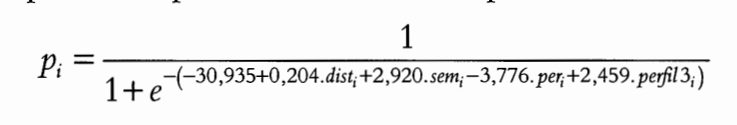


In [ ]:
dados.head()

,estudante,atrasado,dist,sem,per_manha,perfil_agressivo,perfil_moderado,phat
0,Gabriela,0,12.5,7,True,False,False,0.000008
1,Patricia,0,13.3,10,True,False,False,0.037037
2,Gustavo,0,13.4,8,True,False,True,0.000597
3,Leticia,0,23.5,7,True,False,False,0.000090
4,Luiz Ovidio,0,9.5,8,True,False,False,0.000066


<function matplotlib.pyplot.show(close=None, block=None)>

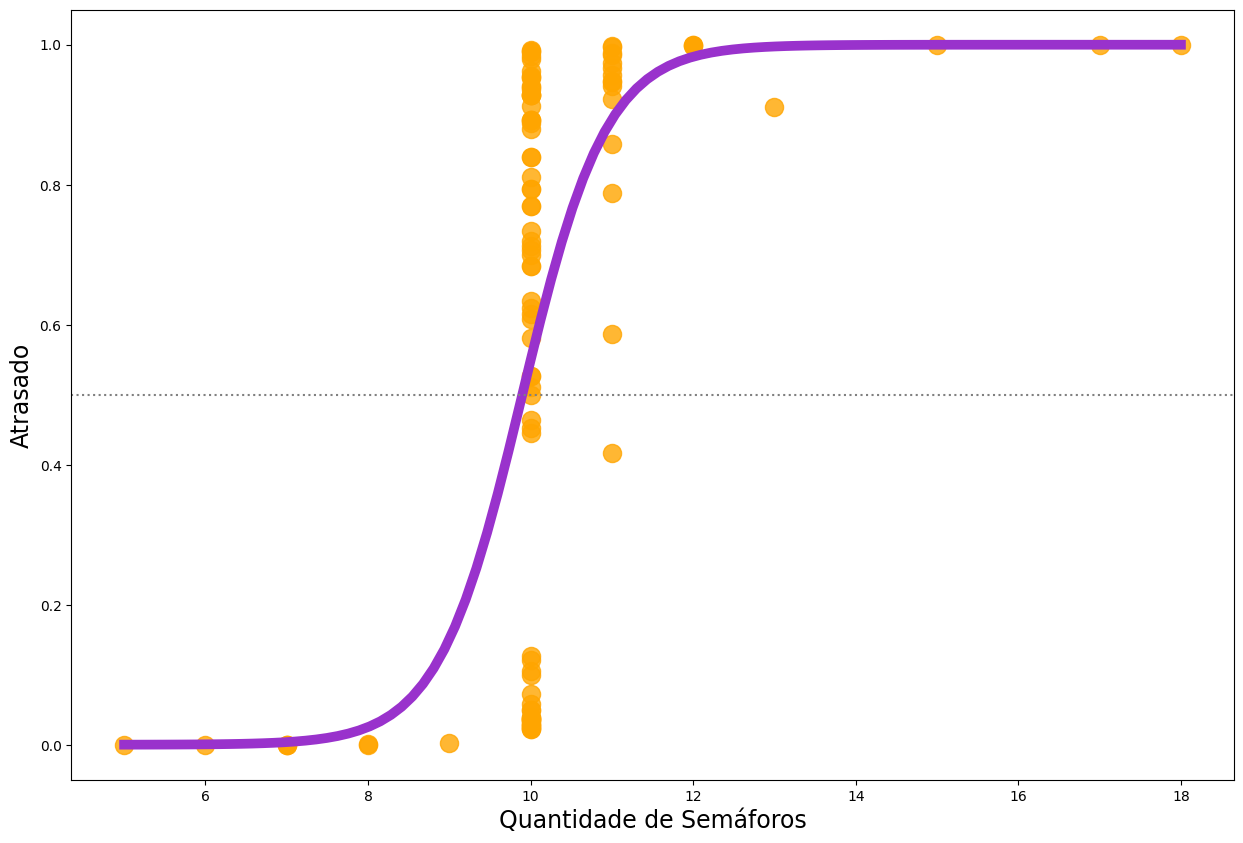

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.regplot(x = dados['sem'], y = dados['phat'],
            data=dados, ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':170},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=17)
plt.ylabel('Atrasado', fontsize=17)
plt.show

In [ ]:
# Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):

    values = predicts.values

    predicao_binaria = []

    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)

    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()

    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    # Visualização dos principais indicadores da matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

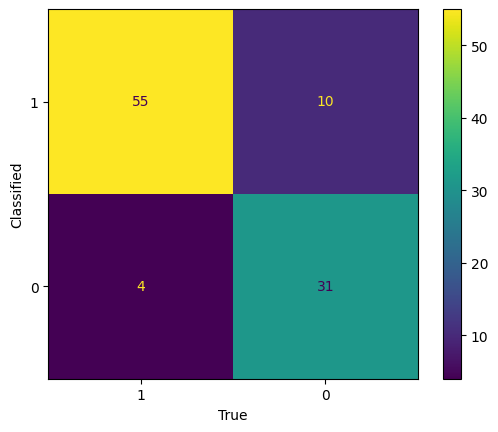

,Sensitividade,Especificidade,Acurácia
0,0.932203,0.756098,0.86


In [ ]:
matriz_confusao(observado=dados['atrasado'],
                predicts=dados['phat'],
                cutoff=0.5)

In [ ]:
def espec_sens(observado,predicts):

    # adicionar objeto com os valores dos predicts
    values = predicts.values

    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)

    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []

    for cutoff in cutoffs:

        predicao_binaria = []

        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)

        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)

        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)

    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [ ]:
dados_plotagem = espec_sens(observado = dados['atrasado'],
                            predicts = dados['phat'])
dados_plotagem

,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.195122
2,0.02,1.000000,0.195122
3,0.03,1.000000,0.365854
4,0.04,1.000000,0.512195
...,...,...,...
96,0.96,0.305085,1.000000
97,0.97,0.271186,1.000000
98,0.98,0.237288,1.000000
99,0.99,0.169492,1.000000


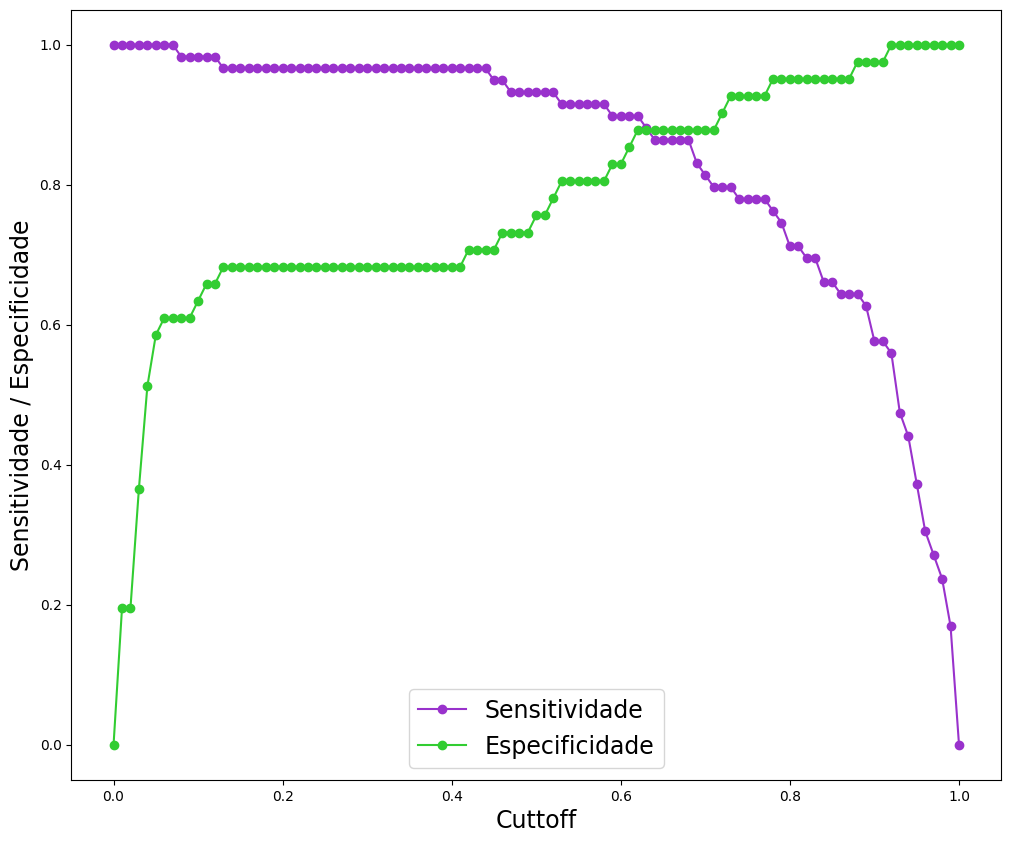

In [ ]:

plt.figure(figsize=(12,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color='darkorchid')
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color='limegreen')
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel('Cuttoff', fontsize=17)
plt.ylabel('Sensitividade / Especificidade', fontsize=17)
plt.show()